<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/CV/02_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Inference

In [ ]:
import tensorflow as tf
import sys
import cv2
import numpy as np
from glob import glob
from models import Yolov4

In [ ]:
#외부에서 import한 모듈을 수정사항 발생 시 매번 Reload하면 번거롭다.
#자동 리로드하는 방법을 알아보자.

%load_ext autoreload
%autoreload 2

In [ ]:
model = Yolov4(weight_path='./yolov4.weights',
               class_name_path='./class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from ./yolov4.weights


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


img shape:  (185, 273, 3)
1/1 [==============================] - 7s 7s/step
# of bboxes: 12


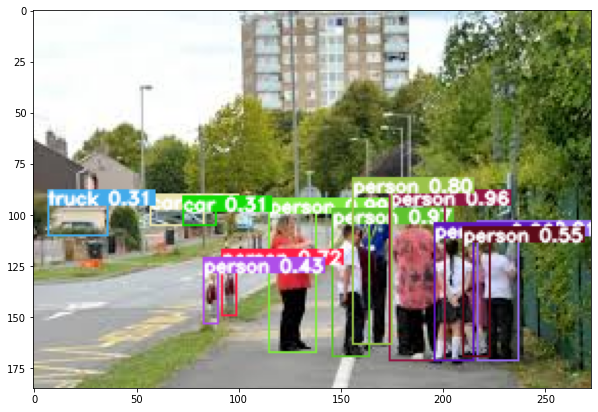

,x1,y1,x2,y2,class_name,score,w,h
0,115,99,138,167,person,0.993157,23,68
1,146,104,164,169,person,0.968451,18,65
2,174,95,201,171,person,0.958894,27,76
3,217,110,237,171,person,0.910902,20,61
4,196,111,215,171,person,0.864910,19,60
5,156,89,175,163,person,0.801273,19,74
6,92,124,99,149,person,0.717211,7,25
7,210,113,223,169,person,0.547909,13,56
8,83,128,90,153,person,0.428258,7,25
9,57,97,83,105,car,0.344773,26,8


In [ ]:
model.predict('./img/street.jpeg', random_color=True)

Generate your annotation files (.XML) in VOC format for each images

HINT: An easily used annotation tool: <a href="https://github.com/heartexlabs/labelImg">labelImg</a>

Example: A 2 object xml file

# YOLO XML to csv

In [ ]:
import xml.etree.ElementTree as ET
import os
from glob import glob

XML_PATH = './dataset/xml'
CLASSES_PATH = './class_names/voc_small_classes.txt'
TXT_PATH = './dataset/txt/anno.txt'


In [ ]:
'''loads the classes'''
def get_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

In [ ]:
classes = get_classes(CLASSES_PATH)
assert len(classes) > 0, 'no class names detected!'
print(f'num classes: {len(classes)}')

num classes: 8


In [ ]:
# output file
list_file = open(TXT_PATH, 'w')

In [ ]:
for path in glob(os.path.join(XML_PATH, '*.xml')):
    in_file = open(path)

    # Parse .xml file
    tree = ET.parse(in_file)
    root = tree.getroot()
    # Write object information to .txt file
    file_name = root.find('filename').text
    print(file_name)
    list_file.write(file_name)
    for obj in root.iter('object'):
        cls = obj.find('name').text 
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))
    list_file.write('\n')
list_file.close()

2007_000027.jpg
2007_000032.jpg
2007_000039.jpg
2007_000068.jpg
2007_000123.jpg
2007_000187.jpg
2007_000243.jpg


# YOLO TRAINING

In [ ]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config

In [ ]:
train_lines, val_lines = read_annotation_lines('./dataset/txt/anno.txt', test_size=0.1)
FOLDER_PATH = './dataset/img'
class_name_path = './class_names/bccd_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

In [ ]:
'''
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10,
          val_data_gen=data_gen_val,
          callbacks=[])
'''

'\nmodel.fit(data_gen_train, \n          initial_epoch=0,\n          epochs=10,\n          val_data_gen=data_gen_val,\n          callbacks=[])\n'